# Multi-session analysis
This notebook demonstrate how to combine different xarray dataset together and perform group-level analysis

In [110]:
%reload_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import numpy as np
from glob import glob
import re
from datetime import datetime
from trialexp.process.folder_org.utils import build_session_info, load_and_concat_dataset

## Build dataframe containing the metadata of all sessions

In [111]:
root_path = r'\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\*'

df_session_info = build_session_info(root_path)
df_session_info

,animal_id,expt_datetime,session_id,path,session_no
0,JC313L,2022-12-01 11:17:17,JC313L-2022-12-01-111717,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\JC...,1.0
1,JC313L,2022-12-02 13:45:33,JC313L-2022-12-02-134533,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\JC...,2.0
2,JC313L,2022-12-07 13:33:28,JC313L-2022-12-07-133328,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\JC...,3.0
3,JC314L,2022-12-02 13:48:39,JC314L-2022-12-02-134839,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\JC...,1.0
4,JC314L,2022-12-05 16:15:00,JC314L-2022-12-05-161500,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\JC...,2.0
...,...,...,...,...,...
140,RE604,2023-03-20 09:48:35,RE604-2023-03-20-094835,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\RE...,4.0
141,RE604,2023-03-21 15:45:47,RE604-2023-03-21-154547,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\RE...,5.0
142,RE604,2023-03-22 12:03:36,RE604-2023-03-22-120336,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\RE...,6.0
143,RE604,2023-03-23 09:03:42,RE604-2023-03-23-090342,\\ettin\Magill_Lab\Teris\ASAP\expt_sessions\RE...,7.0


## Loading data

- load the data given task name and session_id
- create function to calculate the task name and session_id from session_info

In [115]:
paths = df_session_info[df_session_info.animal_id=='RE604'].path
ds_combined = load_and_concat_dataset(paths)

  0%|          | 0/8 [00:00<?, ?it/s]

Concating datasets...


In [116]:
ds_combined

<xarray.Dataset>
Dimensions:                            (trial_nb: 322, event_time: 120,
                                        session_id: 8)
Coordinates:
  * trial_nb                           (trial_nb) int64 1 2 3 4 ... 320 321 322
  * event_time                         (event_time) float64 -1.975e+03 ... 3....
  * session_id                         (session_id) object 'RE604-2023-03-15-...
Data variables: (12/18)
    uid                                (session_id, trial_nb) object 'RE604_2...
    trigger                            (session_id, trial_nb) object 'hold_fo...
    valid                              (session_id, trial_nb) float64 1.0 ......
    break_after_abort                  (session_id, trial_nb) float64 1.0 ......
    US_end_timer                       (session_id, trial_nb) float64 0.0 ......
    water_on                           (session_id, trial_nb) float64 0.0 ......
    ...                                 ...
    button_press                       (session_id, trial_nb) float64 0.0 ......
    waiting_for_spout                  (session_id, trial_nb) float64 0.0 ......
    success                            (session_id, trial_nb) float64 0.0 ......
    hold_for_water_analog_1_df_over_f  (session_id, trial_nb, event_time) float64 ...
    first_bar_off_analog_1_df_over_f   (session_id, trial_nb, event_time) float64 ...
    first_spout_analog_1_df_over_f     (session_id, trial_nb, event_time) float64 ...

## Plot figures

<Axes: xlabel='event_time', ylabel='hold_for_water_analog_1_df_over_f'>

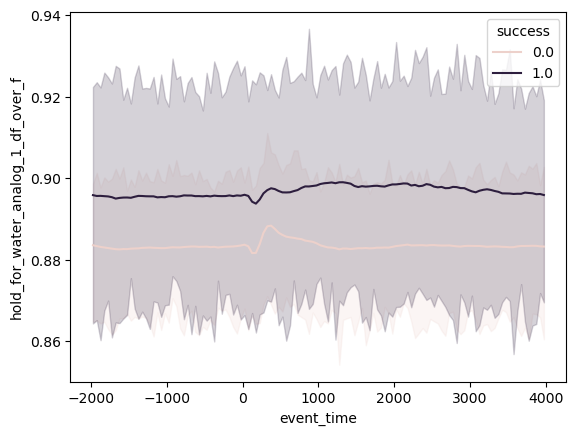

In [117]:
df2plot = ds_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='hold_for_water_analog_1_df_over_f', n_boot=100, data=df2plot)

<Axes: xlabel='event_time', ylabel='first_bar_off_analog_1_df_over_f'>

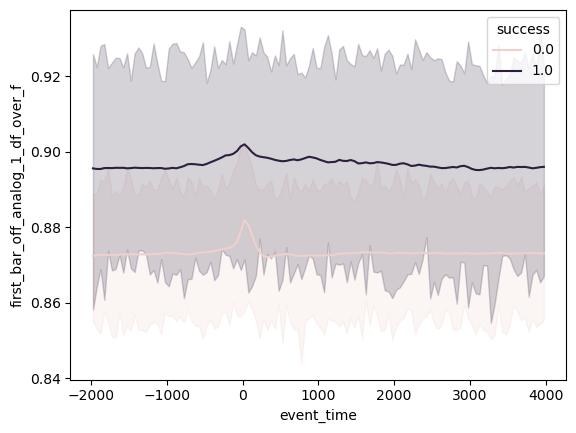

In [118]:
df2plot = ds_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_bar_off_analog_1_df_over_f',n_boot=100,  data=df2plot)

<Axes: xlabel='event_time', ylabel='first_spout_analog_1_df_over_f'>

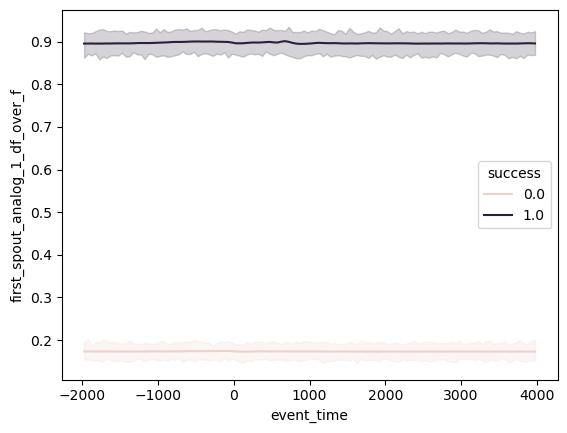

In [119]:
df2plot = ds_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_spout_analog_1_df_over_f',n_boot=100,  data=df2plot)

### ACh

In [9]:
fns = glob(r'Z:/Teris/ASAP/expt_sessions/RE604*/processed/xr_session.nc')
ds_list = load_datasets(fns)
ds_ach_combined = xr.combine_nested(ds_list,'session_id')

100%|██████████| 8/8 [00:01<00:00,  6.78it/s]


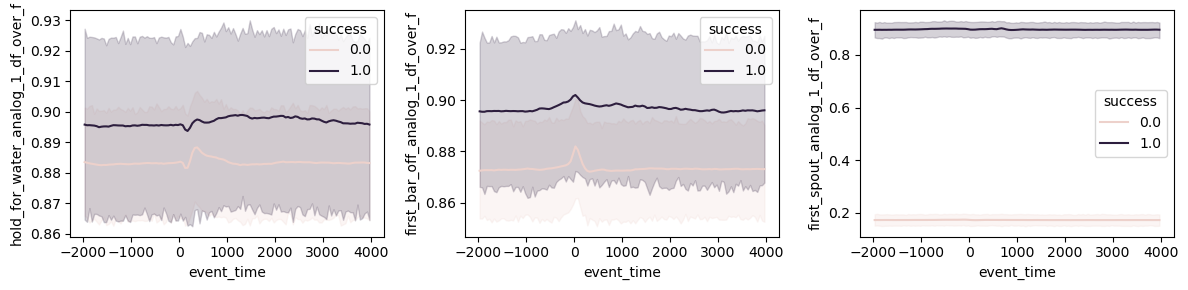

In [10]:
fig,ax = plt.subplots(1,3,figsize=(4*3,3))

df2plot = ds_ach_combined[['hold_for_water_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='hold_for_water_analog_1_df_over_f', data=df2plot, ax=ax[0])

df2plot = ds_ach_combined[['first_bar_off_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_bar_off_analog_1_df_over_f', data=df2plot, ax=ax[1])

df2plot = ds_ach_combined[['first_spout_analog_1_df_over_f', 'success']].to_dataframe().reset_index()
sns.lineplot(x='event_time',hue='success',
            y='first_spout_analog_1_df_over_f', data=df2plot, ax=ax[2])

fig.tight_layout()